# Data Exploration Basics

## Today's Menu
- Environment Setup
- The Data Set
- Audio Metadata
- Annotations
- Audio Features
- Temporal Annotations
- Clustering with kMeans
- Visualization with TSNE

## Task 0: Environment Setup (5 minutes)

**Set up your conda environment**:
- download and install [miniconda](https://www.anaconda.com/docs/getting-started/miniconda/install)
- restart your terminal
- create an environment with `conda create -y -n mlpc2025 -c conda-forge python=3.12 numpy pandas matplotlib scikit-learn jupyterlab`

**Set up the project**:
- download the data set `MLPC2025_data_exploration.zip` from Moodle into your working directory (`WORKING_DIR`)
- unzip the folder
- your project structure should look like this:

```
MLPC2025_data_exploration/                 <---- start your terminal, powershell, etc. here or navigate to this folder (e.g., with `cd`)
├── MLPC2025_dataset/
|   ├── audio/
|   ├──── audio_features/
|   ├──── metadata.csv
|   └──── annotations.csv
└── MLPC2025_Data_Exploration.ipynb      <---- run this notebook
```

Start your terminal, navigate to `MLPC2025_data_exploration`.

Activate the conda environment via `conda activate mlpc2025`.

Start juypterhub via `python -m jupyterlab`.

**Run the cell below** to check your setup.

In [1]:
import os
import math

# if you've setup your environment, importing these libraries should not throw an error
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

PATH_TO_DATASET = 'MLPC2025_dataset'

assert os.path.exists(PATH_TO_DATASET), "The dataset folder 'MLPC2025_dataset' does not exist; download the data set and extract its content."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'annotations.csv')), "The file 'MLPC2025_dataset/annotations.csv' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'metadata.csv')), "The file 'MLPC2025_dataset/metadata.csv' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'audio_features')), "The folder 'MLPC2025_dataset/audio_featues' does not exist."

## Python Packages used

- [Pandas](https://pandas.pydata.org/docs/) for dealing with tabular data
- [Numpy](https://numpy.org/doc/stable/) for features
- [Matplotlib](https://matplotlib.org/stable/users/index.html) for plotting
- [scikit-learn](https://scikit-learn.org/stable/user_guide.html) for Machine Learning

# Data Set (incomplete)

```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── metadata.csv
└── annotations.csv
```


more content next week...

# Metadata

- `metadata.csv` contains metadata information about each file

```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── metadata.csv <--- load this
└── annotations.csv
```

## Loading the Metadata

- let's use `pd.read_csv(PATH_TO_FILE)` to load the CSV table

In [2]:
import pandas as pd

metadata = pd.read_csv(os.path.join(PATH_TO_DATASET, "metadata.csv"))
metadata[["filename", "keywords", "manufacturer"]].head(n=3)

,filename,keywords,manufacturer
0,221934.mp3,"engine, christian, field-recording, people, la...",thatjeffcarter
1,396529.mp3,"Playground, Child-Play, Ambience, Hammering, N...",FullMetalJedi
2,450016.mp3,"motocross, dirt, idle, bike, motorcycle, revs,...",kyles


- the result is a `pd.DataFrame`
    - individual columns are `pd.Series`  
- leftmost column gives the index, to make rows uniquely identifiable
- the header gives the name of the column
- for visualization purposes
    - only the most relevant columns are selected `metadata[LIST_OF_COLUMNS_WE_RE_INTERESTED_IN]`
    - `.head(n=3)` selects the first three rows of the table

## Setting a new index

- column `filname` is a unique identifier for each row
- let's set `filename`as our new index
    - this will allow us to select rows based on the filename
- file extension is annoying, but let's keep it

In [3]:
# set index to filename
metadata.set_index("filename", inplace=True)
metadata[["keywords", "manufacturer"]].head(n=3)

,keywords,manufacturer
filename,,
221934.mp3,"engine, christian, field-recording, people, la...",thatjeffcarter
396529.mp3,"Playground, Child-Play, Ambience, Hammering, N...",FullMetalJedi
450016.mp3,"motocross, dirt, idle, bike, motorcycle, revs,...",kyles


## Some basic properties of the metadata table

In [4]:
##  Shape of Data Frame
print("DataFrame shape: \t", metadata.shape)
print("DataFrame rows: \t", len(metadata.index))
print("DataFrame columns: \t", len(metadata.columns))
print("DataFrame column names: \n", metadata.columns.to_list())

DataFrame shape: 	 (2000, 11)
DataFrame rows: 	 2000
DataFrame columns: 	 11
DataFrame column names: 
 ['keywords', 'freesound_id', 'sound_link', 'manufacturer', 'license', 'title', 'description', 'num_downloads', 'geotag', 'start_time_s', 'end_time_s']


## Select columns
To select a single column, use the square brackets (as you would do for dictionaries)


In [5]:
# select a column
metadata['keywords']
metadata.loc[:, 'keywords'].head(n=3)

filename
221934.mp3    engine, christian, field-recording, people, la...
396529.mp3    Playground, Child-Play, Ambience, Hammering, N...
450016.mp3    motocross, dirt, idle, bike, motorcycle, revs,...
Name: keywords, dtype: object

- the result is a `pd.Series` object
- use `.loc[ROWS, COLUMN]` for a more fine-grained selection
- `:` selects everything

## Select multiple columns

To select multiple columns, provide a list of column names in the square brackets:

In [6]:
metadata[['title', 'keywords']]
metadata.loc[:, ['title', 'keywords']].head(n=3)

,title,keywords
filename,,
221934.mp3,meeting singing on boat - galilee.wav,"engine, christian, field-recording, people, la..."
396529.mp3,Baltic Shipyard3.wav,"Playground, Child-Play, Ambience, Hammering, N..."
450016.mp3,motorcycle dirt bike motocross idle stationary...,"motocross, dirt, idle, bike, motorcycle, revs,..."


- the result is a `pd.DataFrame`object
- use `.loc[ROWS, COLUMNS]` for a more fine grained selection

## Select a row

Use `.loc` to select a row based on the index (filename)

In [7]:
metadata.loc['450016.mp3']

keywords         motocross, dirt, idle, bike, motorcycle, revs,...
freesound_id                                                450016
sound_link       https://freesound.org/people/kyles/sounds/450016/
manufacturer                                                 kyles
license          http://creativecommons.org/publicdomain/zero/1.0/
title            motorcycle dirt bike motocross idle stationary...
description      motorcycle dirt bike motocross idle stationary...
num_downloads                                                  101
geotag                                                         NaN
start_time_s                                                  11.8
end_time_s                                                  38.885
Name: 450016.mp3, dtype: object

- the result is a `pd.Series`

## Select multiple rows

Use `.loc` with a list of indices (filenames) to select multiple rows:

In [8]:
metadata.loc[['438858.mp3', '128446.mp3'], ["title", "manufacturer"]]

,title,manufacturer
filename,,
438858.mp3,G55-04-Cannon Wind.wav,craigsmith
128446.mp3,chain ferry.WAV,inchadney


Use `.loc`to select multiple rows based on a [slice](https://stackoverflow.com/questions/509211/how-slicing-in-python-works):

In [9]:
metadata.loc[::2, ["title", "manufacturer"]].head(n=2)

,title,manufacturer
filename,,
221934.mp3,meeting singing on boat - galilee.wav,thatjeffcarter
450016.mp3,motorcycle dirt bike motocross idle stationary...,kyles


- slice `::2` selects every second element
- the result is a `pd.DataFrame`

## Select rows based on a condition

Quite often we'd like to select rows based on a condition.

To do so, use elementwise comparison and create a Series with True/ False values:

In [10]:
(metadata['manufacturer'] == 'FullMetalJedi').head(n=3)

filename
221934.mp3    False
396529.mp3     True
450016.mp3    False
Name: manufacturer, dtype: bool

- maps index (filename) to True/ False

Use this alignable sequence to select rows for which the condition is True:

In [11]:
metadata.loc[metadata['manufacturer'] == 'FullMetalJedi', 'keywords']

filename
396529.mp3    Playground, Child-Play, Ambience, Hammering, N...
530143.mp3    Yard, Winter, Crow, Horn, Window, Train, Dista...
530125.mp3           Meow, Fake, Kitty, Lips, Imitation, Kitten
396528.mp3    Industrial, Hit, Baltic-Shipyard, Metal, Echoe...
Name: keywords, dtype: object

## How many files do we have per manufacturer?

We might've downloaded too many files from a single manufacturer.

Let's check how many audio files we did collect from each of them.

Use `.value_counts()` to get a series with counts of unique values:

In [12]:
manufacturer_counts = metadata["manufacturer"].value_counts()
manufacturer_counts.head(n=3)

manufacturer
klankbeeld     94
felix.blume    74
kyles          67
Name: count, dtype: int64

- result is a `pd.Series`
- index are the unique values of column ("manufactuer")

## Some simple statistics

We don't want to look through all counts...

Let's compute some simple summary statistics.

Use `.min()`, `.max()`, `.mean()`, `.meadian()` on a column to compute simple summary statistics:

In [13]:
print("Min: ", manufacturer_counts.min())
print("Max: ", manufacturer_counts.max())
print("Mean: ", manufacturer_counts.mean())
print("Median: ", manufacturer_counts.median())

Min:  1
Max:  94
Mean:  1.9436345966958213
Median:  1.0


## A histogram

Or even better: let's plot the distribution of manufacturer counts!


To plot the distribution of values use `.plot.hist(bins=n_bins, figsize=(width, height))`

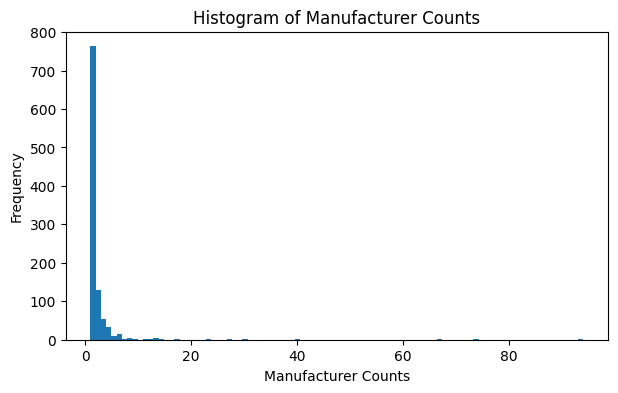

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of Manufacturer Counts")
manufacturer_counts.plot.hist(bins=int(manufacturer_counts.max()), figsize=(7, 4))
plt.xlabel("Manufacturer Counts")
plt.show()

- `plt.title(TITLE)` to add a title
- `plt.xlabel(X_LABEL)` to add a label for the horizontal axis
- `plt.ylabel(Y_LABEL)` to add a label for the vertical axis
- `plt.xticks(LIST_OF_INDICES, LIST_OF_DISPLAYED_NAMES_IN_PLOT)` to change the default ticks on the x axis

## Transforming Columns

Quite often, we want to introduce new columns based on values in the other column.

To create a new column based on an existing one, we can use method `.transform(function)`:

In [15]:
metadata[['keywords']].head(n=2)

,keywords
filename,
221934.mp3,"engine, christian, field-recording, people, la..."
396529.mp3,"Playground, Child-Play, Ambience, Hammering, N..."


Let's create a new column that is True if one of the keywords relates to bad weather:

In [16]:
def is_bad_weather(keywords: str):
    return 'rain' in keywords or 'storm' in keywords or 'thunder' in keywords or 'lightning' in keywords

metadata["bad_weather"] = metadata["keywords"].transform(is_bad_weather)
metadata["bad_weather"].value_counts()

bad_weather
False    1767
True      233
Name: count, dtype: int64

In [17]:
metadata.loc[metadata["bad_weather"] == True, ["title", "keywords"]].head(n=3)

,title,keywords
filename,,
486601.mp3,Rain on bowl with water,"water, raindrops, weather, bowl-with-water, rain"
440488.mp3,Raining on the Glass Window 20180905-3,"thunder, weather, storm, rain, nature"
667706.mp3,"Train passing 300 meters away with loud horn, ...","cricket, blowing, Blume, field-recording, dusk..."


# Annotations

`annotations.csv` contains the text annotations an their regions

```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── metadata.csv
└── annotations.csv <--- load this
```
Let's load it in the same manner as before...

## Tasks (5 minutes)
- 1.1: Load `annotations.csv`
- 1.2: Check the shape of the table
- 1.3: Compute summary statistics
- 1.4: Plot a histogram

## Task 1.1: Load annotations.csv

- use `pd.read_csv(os.path.join(PATH_TO_DATASET, "annotations.csv"))` to load the file and store te result into variable `annotations`

In [18]:
annotations = pd.read_csv(os.path.join(PATH_TO_DATASET, "annotations.csv"))
annotations[["filename", "annotator", "onset", "offset", "text"]].head(n = 3)

,filename,annotator,onset,offset,text
0,387455.mp3,1064150219469060099272839550690797785059878008...,25.777629,26.516667,Light metallic sound like a light metallic cha...
1,388060.mp3,4545048166657454637275074081300844111628564981...,4.315161,5.336709,Clear sound of hitting metallic object on an a...
2,554853.mp3,8880859324073821414854467373956855581335518056...,0.786800,0.938108,Someone stepping on concrete loudly.


## Task 1.2: Shape of the table

- complete the print statements

In [19]:
print("DataFrame shape: \t", annotations.shape)
print("DataFrame rows: \t", len(annotations.index))
print("DataFrame columns: \t", len(annotations.columns))
print("DataFrame column names: \n", annotations.columns.to_list())

DataFrame shape: 	 (7975, 7)
DataFrame rows: 	 7975
DataFrame columns: 	 7
DataFrame column names: 
 ['task_id', 'filename', 'annotator', 'text', 'onset', 'offset', 'filename_unsafe']


## Task 1.3: How many annotations per file did we collect?

- count the number of annotations per file using `.value_counts()`
- compute simple summary statistics and complete the print statements

In [20]:
annotations_per_file = annotations["text"].value_counts()

print("Min: ", annotations_per_file.min())
print("Max: ", annotations_per_file.max())
print("Mean: ", annotations_per_file.mean())
print("Median: ", annotations_per_file.median())

Min:  1
Max:  59
Mean:  1.491490555451655
Median:  1.0


## Task 1.4: Plot a histogram or barplot of the annotations per file

- use `.plot.hist(bins=annotations_per_file.max(), figsize=(10, 3))`
- add labels for the horizontal and vertical axes

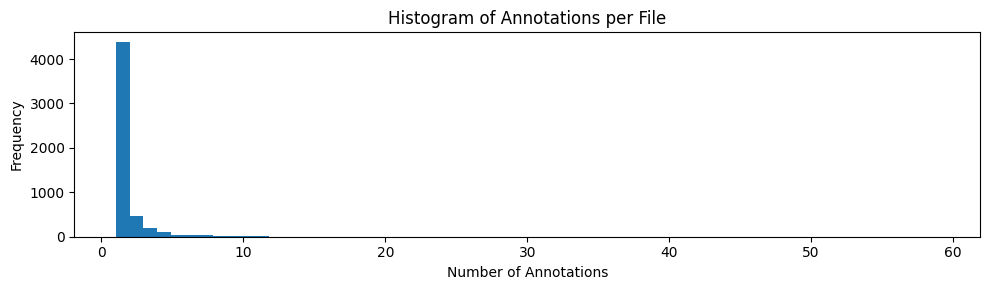

In [21]:
plt.title("Histogram of Annotations per File")
annotations_per_file.plot.hist(bins=annotations_per_file.max(), figsize=(10, 3))
plt.xlabel("Number of Annotations")
plt.tight_layout()
plt.savefig('Task_1.4_annotations_per_file_histogramm.png')
plt.show() # plt.savefig('filename.png') to store it on the hard drive

## How long are these temporal annotations?

There's no column with the duration in the annotations data frame. Can we compute it?

In [22]:
annotations[["filename", "onset", "offset", "text"]].head(n = 2)

,filename,onset,offset,text
0,387455.mp3,25.777629,26.516667,Light metallic sound like a light metallic cha...
1,388060.mp3,4.315161,5.336709,Clear sound of hitting metallic object on an a...


- subtract `annotations[offset]` from `annotations['onset']` to get a new column
- assign the result to a new column `annotations['duration']`
- use `.plot.hist(bins=metadata['duration'].max(), figsize=(10, 5))`

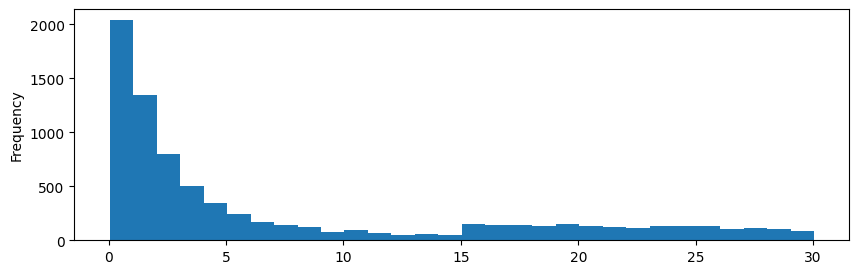

In [23]:
annotations["duration"] = annotations["offset"] - annotations["onset"]
annotations["duration"].plot.hist(bins=int(annotations["duration"].max()), figsize=(10, 3))
plt.show()

## Grouping

Quite often, we're interested in comparing statistics for different groups.

We can group the table by distinct values in a column using `.groupby(COLUMN_NAME)` and compute statistics for each group:

In [24]:
median_duration_per_annotator = annotations.groupby("annotator")["duration"].median()
median_duration_per_annotator.head(n=3)

annotator
100085476285274256355828104148824375899078643541741339916509444476406988392584    1.006873
100089183809167624412319886016267345026042253447206416504227781766250814596242    3.209427
100244901742626191928938396361966568568817162902949675108480834100485871510410    1.002949
Name: duration, dtype: float64

- gives the median annotation duration for each annotator

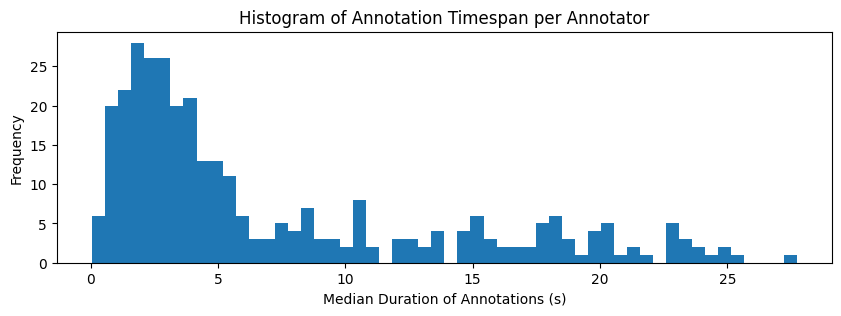

In [25]:
plt.title("Histogram of Annotation Timespan per Annotator")
median_duration_per_annotator.plot.hist(bins=int(median_duration_per_annotator.max())*2, figsize=(10, 3))
plt.xlabel("Median Duration of Annotations (s)")
plt.show()

## Merging two Tables
 
We might want to concatenate the keywords associated with each audio file (in `metadata`) to the annotations.

In [26]:
metadata[['keywords']].head(1)

,keywords
filename,
221934.mp3,"engine, christian, field-recording, people, la..."


In [27]:
annotations[['filename', 'onset', 'offset', 'text']].head(1)

,filename,onset,offset,text
0,387455.mp3,25.777629,26.516667,Light metallic sound like a light metallic cha...


<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png"/> (Figure taken from pandas.pydata.org)

In [28]:
annotations = annotations.merge(metadata, on="filename", how="left", suffixes=('', '_metadata'))
annotations[["filename", "duration", "text", "keywords"]].head(1)

,filename,duration,text,keywords
0,387455.mp3,0.739038,Light metallic sound like a light metallic cha...,"ol, Motor, Bus, Micro, Peru, Espa, Wallas, Pub..."


- `on` specifies how to connect the two tables
- if there were filenames in metadata that are not in annotations, `how="left"` would simply ignore them; more info [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).
- `suffixes` defines a suffix in case two columns have the same name

# Audio Features

We precomputed the audio features with an [audio embedding model](https://arxiv.org/pdf/2409.09546) for you.

There is one feature tensor stored as a file in the `MLPC2025_dataset`

```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/ <--- load this
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── metadata.csv
└── annotations.csv 
```

The exact meaning of the individual features is not too critical for now - we'll introduce them next time.


In [29]:
# IF YOUR PC CANNOT HANDLE ALL FILES, UNCOMMENT THESE LINES TO ONLY LOAD 500 FILES
# metadata = metadata.sample(frac=0.25, replace=False, random_state=974471)
# annotations = annotations.loc[annotations["filename"].isin(metadata_subsampled.index)]

## Loading the Audio Features

Audio feature tensors can be loaded via `np.load(path_to_feature_file)["embeddings"]`:
- iterate over all rows in the metadata file
- store each numpy tensor in a dictionary
- use the filename as a key

In [30]:
metadata[['keywords']].head(n=2)

,keywords
filename,
221934.mp3,"engine, christian, field-recording, people, la..."
396529.mp3,"Playground, Child-Play, Ambience, Hammering, N..."


In [31]:
import numpy as np

audio_features = {}

for idx, row in metadata.iterrows():
    file_name = idx.replace("mp3", "npz")
    path_to_feature_file = os.path.join(PATH_TO_DATASET, "audio_features", file_name)
    
    features = np.load(path_to_feature_file)["embeddings"]
    audio_features[idx] = features
print("Number of feature files:", len(audio_features))

Number of feature files: 2000


## Some Statistics and a Visualization

In [32]:
feature_tensor = audio_features[metadata.index[0]]
print("Shape of feature tensor:", feature_tensor.shape)
print("Time steps: \t\t", len(feature_tensor))
print("Feature vector size: \t", feature_tensor.shape[1])

Shape of feature tensor: (171, 768)
Time steps: 		 171
Feature vector size: 	 768


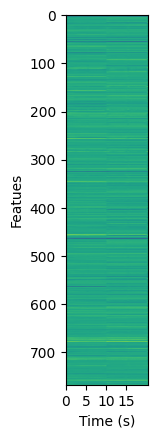

In [33]:
plt.imshow(feature_tensor.T)
plt.xlabel("Time (s)")
plt.ylabel("Featues")
plt.xticks(np.arange(0,20,5)/0.12, np.arange(0,20,5))
plt.show()

## Feature Normalization

For normalization, we typically compute the mean and the standard deviation of all 768 features along the time dimension.

The easiest way to do this is by concatenating all feature tensors along the time dimension via `np.concatenate`:

In [34]:
concatenated_feature_tensor = np.concatenate(list(audio_features.values()), axis=0)
print("Shape of all feature tensors concatenated:", concatenated_feature_tensor.shape)

Shape of all feature tensors concatenated: (375176, 768)


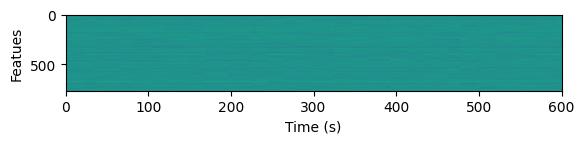

In [35]:
plt.imshow(concatenated_feature_tensor[:5000].T) # transposed for visualization
plt.xlabel("Time (s)")
plt.ylabel("Featues")
plt.xticks(np.arange(0,700,100)/0.12, np.arange(0,700,100))
plt.show()

Use scikit-learn's `preprocessing.StandardScaler()` to compute mean and standard deviation:

In [36]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(concatenated_feature_tensor)

del concatenated_feature_tensor # we don't need that one anymore ...

- fit takes a numpy array of shape `(num_samples, num_features)`
- internally, it computes the mean and standard deviation over the first dimension for normalization
- later, we can use `scaler.transform(feature_tensor)` to normalize a feature tensor

## Normalized Features

Here's a comparison between the original, and the normalized features:

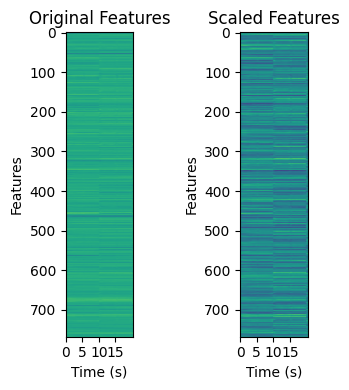

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(4, 4))  # Create a figure with 1 row and 2 columns
axes[0].imshow(feature_tensor.T)
axes[0].set_xlabel("Time (s)"); axes[0].set_ylabel("Features")
axes[0].set_xticks(np.arange(0, 20, 5) / 0.12)
axes[0].set_xticklabels(np.arange(0, 20, 5))
axes[0].set_title("Original Features")
axes[1].imshow(scaler.transform(feature_tensor).T)
axes[1].set_xlabel("Time (s)"); axes[1].set_ylabel("Features")
axes[1].set_xticks(np.arange(0, 20, 5) / 0.12)
axes[1].set_xticklabels(np.arange(0, 20, 5))
axes[1].set_title("Scaled Features")
plt.tight_layout(); plt.show()  # Adjust layout for better spacing

# Temporal Annotations

Each annotation is associated with a specific region ins a file (onset and offset):

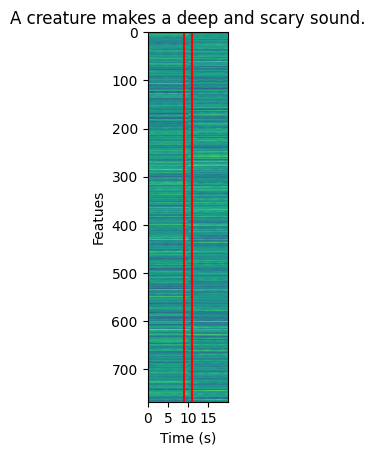

In [38]:
i = 5
plt.imshow(scaler.transform(audio_features[annotations.iloc[i]['filename']]).T)
plt.title(annotations.iloc[i]['text'])
plt.axvline(x=annotations.iloc[i]['onset'] // 0.12, color='r')
plt.axvline(x=annotations.iloc[i]['offset'] // 0.12, color='r')
plt.xlabel("Time (s)")
plt.ylabel("Featues")
plt.xticks(np.arange(0,20,5)/0.12, np.arange(0,20,5))
plt.show()

## Extracting Audio Features for Each Annotated Region

To extract features for this particular region, you can use `get_features_of_annotation`:
- the function **selects the correct region** in the feature tensor
- **aggregates** the features over the time dimension to represent all regions as a 768-dimensional vector

In [39]:
import math

def get_features_of_annotation(
    onset: float, 
    offset: float, 
    audio_features: np.ndarray, 
    scaler: preprocessing.StandardScaler = None
) -> np.ndarray:

    RESOLUTION = 0.12 # temporal resolution of the features is 120 ms
    start_idx = math.floor(onset / RESOLUTION)
    offset_idx = math.ceil(offset / RESOLUTION)
    
    audio_features = audio_features[start_idx:offset_idx, :]
    if scaler is not None:
        audio_features = scaler.transform(audio_features)    
    return audio_features.mean(axis=0)

Compute one 768-dimensional vector for each annotated region:

In [40]:
X = np.zeros((len(annotations), 768))
for i, row in annotations.iterrows():
    X[i] = get_features_of_annotation(row['onset'], row['offset'], audio_features[row['filename']], scaler)

In [41]:
print("Audio Features of annotated regions:", X.shape)

Audio Features of annotated regions: (7975, 768)


# Clustering the Audio Features

Let's see if we can identify meaningful clusters of audio regions.

`sklearn.cluster` offers a variety of clustering algorithms; you can find an overview [here](https://scikit-learn.org/stable/modules/clustering.html).

We'll use k-means clustering with 25 cluster centers:

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, max_iter=300, random_state=14124).fit(X)
clusters_assignment = kmeans.predict(X)
annotations['cluster_assignment'] = clusters_assignment
annotations['cluster_assignment'].head(5)

0     7
1     5
2    21
3    18
4     5
Name: cluster_assignment, dtype: int32

- use `fit` to learn the cluster centers; the output is a KMeans object containing the learned cluster centers `.cluster_centers_`
- use `.predict(feature_vecors)` to find the cluster assignment for the regions
- in your experiments, you will need to play around with the number of cluster centers; 25 is probably not the best choice
- use `random_state` to make the outcome reproducible

## Assigning Meaning to Clusters

We've found 25 clusters. To which categories do they correspond?

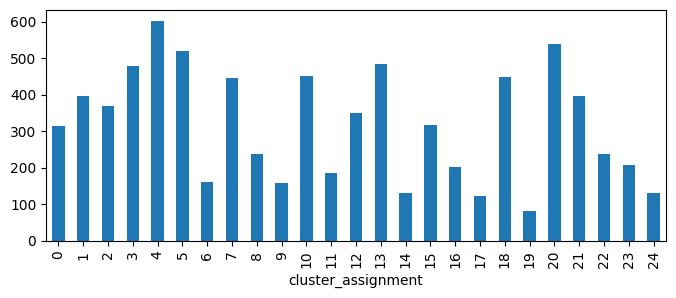

In [43]:
counts = annotations["cluster_assignment"].value_counts(sort=False).sort_index()
counts.plot(kind="bar", figsize=(8, 3))
plt.show()

We need lablels for the annotated regions... use the text!

##  Use the textual annotations to create approximate labels

**Search for keywords in the text annotations** (e.g., rain, thunder, storm, ...). 

If the text annotation contains a relevant word (e.g., "It is raining cats and dogs."), we can assume that it belongs to the desired category.

Let's define a function `is_bad_weather` which returns `True` if the annotation contains one of these keywords and `False` otherwise.

In [44]:
def is_bad_weather(text_annotation):
    keywords = ["rain", "storm", "thunder", "lightning"]
    return any([kw in text_annotation for kw in keywords])

Use `.tranform` to convert the `text` column to our labels.

In [45]:
annotations['bad_weather'] = annotations["text"].transform(is_bad_weather)
annotations['bad_weather'].value_counts()

bad_weather
False    7656
True      319
Name: count, dtype: int64

## Let's check the result

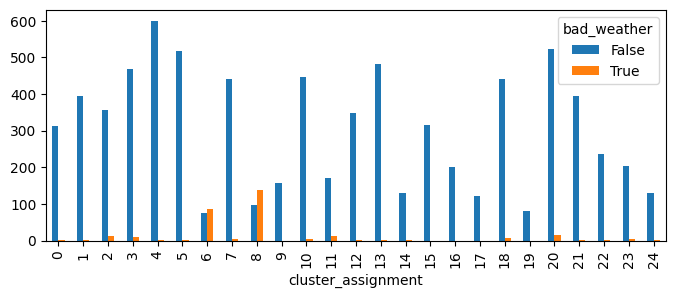

In [46]:
# goup by cluster and bad_weater, get size of eah group and then pivot bad weather from index to column
counts = annotations[["cluster_assignment", "bad_weather"]].groupby(["cluster_assignment", "bad_weather"]).size().unstack()

counts.plot(kind="bar", figsize=(8, 3))
plt.show()

Let's check the two clusters..

## Let's check the result (cont'd)
Check Cluster 8

In [47]:
annotations.loc[annotations['cluster_assignment'] == 8, 'text'].head(n=5)

40                                A sudden loud thunder 
62              Thunder rumbling quietly in the distance
202                              thunder in the distance
216    Thunder slowly building up until it reaches a ...
244    Rain gradually decreasing in intensity, fading...
Name: text, dtype: object

Check Cluster 6

In [48]:
annotations.loc[annotations['cluster_assignment'] ==  6, 'text'].head(n=3)

155    Train horn followed by the sound of the train ...
159                A train wagon crossing gaps in rails.
180    A train rushes through the station at high spe...
Name: text, dtype: object

## Task 2: Can you improve 'is_bad_weather' to give a more accurate label? (5 minutes)
- copy `is_bad_weather` from above and try to improve it

In [49]:
def is_bad_weather(text_annotation):
    keywords = ["rain", "Rain", "Storm", "storm", "Thunder", "thunder", "lightning", "Lightning"]
    return any([kw in text_annotation for kw in keywords])

Use this to verify your implementation:

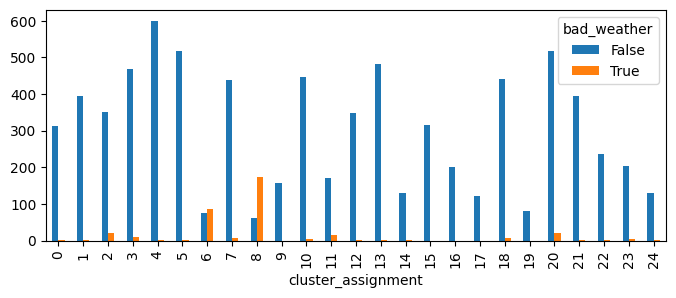

In [50]:
annotations["bad_weather"] = annotations["text"].transform(is_bad_weather)
counts = annotations[["cluster_assignment", "bad_weather"]].groupby(["cluster_assignment", "bad_weather"]).size().unstack()

counts.plot(kind="bar", figsize=(8, 3))
plt.show()

In [51]:
annotations.loc[annotations['cluster_assignment'] ==  8, ['text', 'bad_weather']].head(n=3)

,text,bad_weather
40,A sudden loud thunder,True
62,Thunder rumbling quietly in the distance,True
202,thunder in the distance,True


# Visualization

Clusters in the 768-dimensional vector space are hard to visualize.

Let's project them to points on a two-dimensional plane in a way that preserves the neighborhood relationships between points.
- optimization criterion: points that are close to each other in the 768-dimension space, should be close in the 2-dimensional space

[t-distributed Stochastic Neighborhood Embedding](https://distill.pub/2016/misread-tsne/) (TSNE) does exactly that!

Let's use scikit-learn's TSNE class to embed the audio feature vectors of the annotations.

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
tsne.shape

(7975, 2)

- use `fit_transform` to learn the embedding; it returns the embedded vecors
- `n_components` is the number of dimensions after projection (use 2 for 2D plots or 3 for 3D plots)
- `perplexity` is a hyper-parameters that related to the size of the neighborhood; you need to find a good choice here
- `random_state` seeds the RNG and makes the result reproducible

## Scatter plot

Let's visualize the results as a scatter plot:

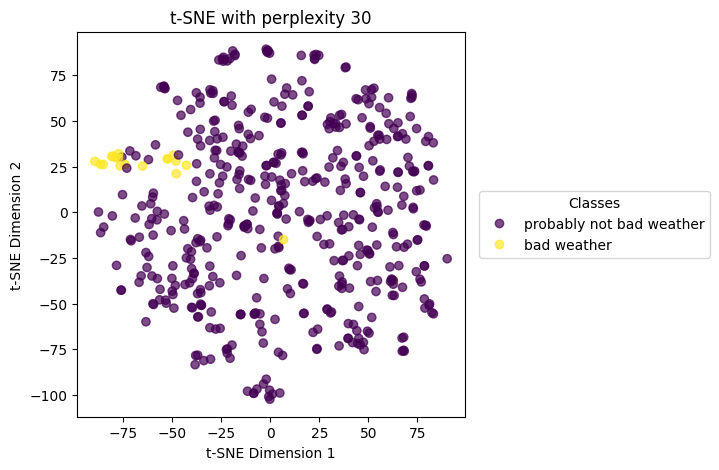

In [53]:
np.random.seed(2982)
sample_indices = np.random.choice(len(X), size=min(500, len(X)), replace=False) # Subsample data points to reduce visual clutter
tsne_sampled = tsne[sample_indices]
y_sampled = annotations["bad_weather"].loc[sample_indices]
plt.figure(figsize=(5, 5))
scatter = plt.scatter(tsne_sampled[:, 0], tsne_sampled[:, 1], c=y_sampled, alpha=0.7)
handles, _ = scatter.legend_elements() # Create a legend
plt.legend(handles, ['probably not bad weather', 'bad weather'], title="Classes", ncols=1, loc='center right', bbox_to_anchor=(1.65, 0.5))
plt.xlabel("t-SNE Dimension 1"); plt.ylabel("t-SNE Dimension 2"); plt.title(f"t-SNE with perplexity 30")
plt.show()

## Task 3: Can you find a cluster of insect buzzing sounds?

Define a function to convert text annotations into binary labels (True/ False).
- search for keywords such as "buzzing", "bee ", "bees ", or "insect"

In [54]:
def is_insect(text_annotation):
    keywords = ["buzzing", "Bee", "bee ", "Bees", "bees ", "Fly", "fly", "Insect", "insect"]
    return any([kw in text_annotation for kw in keywords])
    
annotations['insect'] = annotations["text"].transform(is_insect)

## Check the insect annotations found

If this list contains a lot of unrelated sounds, you might want to revise your `is_insect` function: 

In [55]:
annotations.loc[annotations["insect"], "text"].head(n=10)

22     Insect flying and buzzing, at first only quiet...
63         The muffled sound of a mosquito flying nearby
112                     fly buzzes loudly at close range
113                      bee micro buzzing very silently
121    A muscle car engine starting with a deep, powe...
130                 unstable sound of bee buzzing nearby
135    An insect flying by with a high-pitched buzzin...
185                                      a Beeping sound
190    Two bees trying to escape a fly net in the woo...
198                  A few bees are buzzing repeatedly. 
Name: text, dtype: object

## Check if there's a cluster that corresponds to the insect sounds

One of the clusters should have a high number of insect related text annotations.

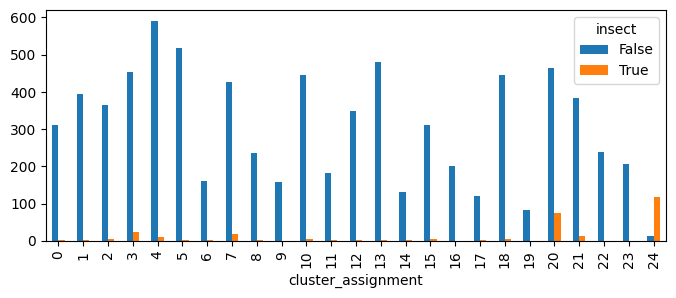

In [56]:
# goup by cluster and bad_weater, get size of eah group and then pivot bad weather from index to column
counts = annotations[["cluster_assignment", "insect"]].groupby(["cluster_assignment", "insect"]).size().unstack()

counts.plot(kind="bar", figsize=(8, 3))
plt.show()

In [57]:
annotations.loc[annotations["cluster_assignment"] == 24, "text"].head(n=5)

22     Insect flying and buzzing, at first only quiet...
112                     fly buzzes loudly at close range
113                      bee micro buzzing very silently
130                 unstable sound of bee buzzing nearby
190    Two bees trying to escape a fly net in the woo...
Name: text, dtype: object

## Scatter Plot

Is there also a cluster in the low-dimensional projection?

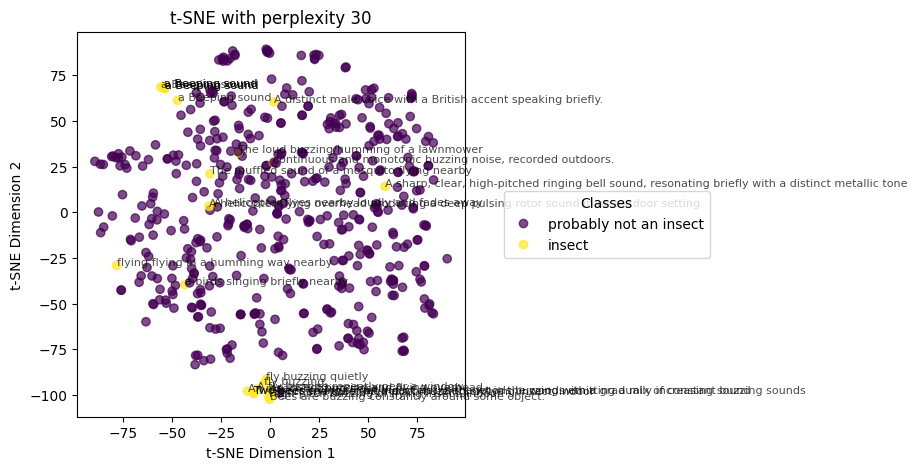

In [58]:
tsne_sampled = tsne[sample_indices]
y_sampled = annotations["insect"].loc[sample_indices]
plt.figure(figsize=(5, 5))
scatter = plt.scatter(tsne_sampled[:, 0], tsne_sampled[:, 1], c=y_sampled, alpha=0.7)
for i, (label, bad) in enumerate(zip(annotations["text"].loc[sample_indices], annotations["insect"].loc[sample_indices])): # Add labels for subsampled points
    if bad:
        plt.text(tsne_sampled[i, 0], tsne_sampled[i, 1], str(label), fontsize=8, alpha=0.7)
        
handles, _ = scatter.legend_elements() # Create a legend
plt.legend(handles, ['probably not an insect', 'insect'], title="Classes", ncols=1, loc='center right', bbox_to_anchor=(1.65, 0.5))
plt.xlabel("t-SNE Dimension 1"); plt.ylabel("t-SNE Dimension 2"); plt.title(f"t-SNE with perplexity 30")
plt.show()

# Exploration Task

Complete MLPC2024_dataset:
```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── text_features/
│   ├── ...
├── keywords_features/
│   ├── ...
├── metadata.csv
└── annotations.csv
```

- more data (12k instead of 2k)
- text embeddings
- keyword embeddings 
- additional audio features

**Data exploration task will be presented next week!**